importing important libraries and dependencies

In [ ]:
import pandas as pd 
import nltk # natural language processing for tokenization, lemmatization, stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#sentiment analysis
from textblob import TextBlob # textblob for lexicon-based sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer # vader for lexicon-based sentiment analysis
from sklearn.feature_extraction.text import TfidfVectorizer # to extract key words based on weights of frequency
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # naive bayes classifier for machine learning based analysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans # k-means clustering for grouping the extracted words
from sklearn.decomposition import PCA


#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

downloading necessary data kit

In [ ]:
nltk.download('punkt') # used for tokenization
nltk.download('stopwords') # gives a bunch of stopwords
nltk.download('wordnet') # used for lemmatization
nltk.download('punkt_tab') # used for tokenization with non-english texts
nltk.download('vader_lexicon') # vader for lexicon-based analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

loading the data

In [ ]:
df = pd.read_csv('data cleaning script and data/dashenBank_cleaned.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source
0,0,0,i like this mobile banking app very much. over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play Store
1,1,1,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play Store
2,2,2,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play Store
3,3,3,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play Store
4,4,4,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play Store


removing stop words, lemmatization and tokenization the "content"

In [ ]:
import re
def text(text):
    tokens = word_tokenize(str(text))
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['final_review'] = df['review'].apply(text)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review
0,0,0,i like this mobile banking app very much. over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play Store,like mobile banking app much overall user inte...
1,1,1,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play Store,love
2,2,2,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play Store,መቸሸጠ
3,3,3,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play Store,wow
4,4,4,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play Store,gadaa


Sentiment analysis using textblob

In [ ]:
def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.polarity > 0:
        return 'positive'
    elif analysis.polarity < 0:
        return 'negative'  
    return 'neutral'

df['textBlob_result'] = df['final_review'].apply(textblob_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review,textBlob_result
0,0,0,i like this mobile banking app very much. over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play Store,like mobile banking app much overall user inte...,positive
1,1,1,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play Store,love,positive
2,2,2,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play Store,መቸሸጠ,neutral
3,3,3,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play Store,wow,positive
4,4,4,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play Store,gadaa,neutral


Sentiment analysis using vader

In [ ]:
def vader_sentiment(text):
    analysis = SentimentIntensityAnalyzer().polarity_scores(text)
    if analysis['compound'] > 0:
        return 'positive'
    elif analysis['compound'] < 0:
        return 'negative'  
    return 'neutral'

df['vader_result'] = df['final_review'].apply(vader_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,review,rating,date,bank,source,final_review,textBlob_result,vader_result
0,0,0,i like this mobile banking app very much. over...,2,2025-06-07 10:40:29,Dashen Bank,Google Play Store,like mobile banking app much overall user inte...,positive,positive
1,1,1,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play Store,love,positive,positive
2,2,2,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play Store,መቸሸጠ,neutral,neutral
3,3,3,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play Store,wow,positive,positive
4,4,4,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play Store,gadaa,neutral,neutral


Sentimental analysis using Naive-Bayes model

In [ ]:
# preparing the labeled data for training
def label(n):
    if n > 3:
        return 'positive'
    elif n < 3:
        return 'negative'
    return 'neutral'
df['label'] = df['rating'].apply(label)

vectorizing the review ( mapping each words to a numerical value that the Naive-bayes can work on)
TF(word) = (Number of times word appears in a document) / (Total words in the document)
IDF(word) = log(Total number of documents / Number of documents containing the word)
TF-IDF(word) = TF(word) * IDF(word)

In [ ]:
vectorizer = TfidfVectorizer()
input_feature = vectorizer.fit_transform(df['final_review'])
label = df['label']


spliting the data as test and train data and training the NB model

In [ ]:
input_train, input_test, label_train, label_test = train_test_split(input_feature, label, test_size=0.3, random_state=50)

naive_bayes = MultinomialNB()
naive_bayes.fit(input_train,label_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


checking the accuracy of the model

In [ ]:
predicted = naive_bayes.predict(input_test)
print(f"Accuracy: {accuracy_score(label_test,predicted)}")

Accuracy: 0.837037037037037


o.78 accuracy shows that if we judge the review based on the given star then the given star will tell about the reviews sentiment with > 78% accuracy

KeyWord Extraction using TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=100)
input = vectorizer.fit_transform(df['final_review'])
keyword = vectorizer.get_feature_names_out()
print(keyword)

['able' 'account' 'ahead' 'also' 'always' 'amazing' 'amole' 'app'
 'application' 'balance' 'bank' 'banking' 'best' 'better' 'bill' 'budget'
 'changer' 'chat' 'convenience' 'convenient' 'customer' 'dashen' 'design'
 'digital' 'easier' 'easily' 'easy' 'ethiopia' 'ethiopian' 'ever'
 'everything' 'excellent' 'experience' 'fast' 'feature' 'financial'
 'friendly' 'game' 'good' 'great' 'highly' 'incredibly' 'innovation'
 'interface' 'intuitive' 'keep' 'life' 'like' 'local' 'lot' 'love' 'make'
 'making' 'many' 'mobile' 'money' 'need' 'new' 'nice' 'one' 'option' 'pay'
 'payment' 'place' 'platform' 'product' 'really' 'recommended' 'reliable'
 'seamless' 'secure' 'security' 'service' 'shopping' 'simple' 'slow'
 'smooth' 'solution' 'speed' 'step' 'super' 'superapp' 'supper' 'telebirr'
 'thanks' 'time' 'transaction' 'transfer' 'truly' 'update' 'use' 'used'
 'user' 'using' 'version' 'well' 'work' 'working' 'wow' 'ነው']


Extracting the positive and negative keyword

In [ ]:
positive = df[df['textBlob_result']=='positive']['final_review']
neutral = df[df['textBlob_result']=='neutral']['final_review']
negative = df[df['textBlob_result']=='negative']['final_review']

In [ ]:
vectorizer = TfidfVectorizer(max_features=20)
positive_input = vectorizer.fit_transform(positive)
positive_words = vectorizer.get_feature_names_out()


vectorizer = TfidfVectorizer(max_features=20)
neutral_input = vectorizer.fit_transform(neutral)
neutral_words = vectorizer.get_feature_names_out()


vectorizer = TfidfVectorizer(max_features=100)
negative_input = vectorizer.fit_transform(negative)
negative_words = vectorizer.get_feature_names_out()

grouping the extracted data

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=40)
kmeans.fit(negative_input)

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    top_keywords = [terms[ind] for ind in order_centroids[i, :50]]
    print(f"Cluster {i}: {', '.join(top_keywords)}")

Cluster 0: close, function, disappointing, app, try, transaction, time, take, super, speed, soon, slow, service, please, online, one, nightmare, need, money, mobile, market, mar, many, managing, making, make, main, lucky, lot, longer, long, loading, worst, user, used, use, lacking, late, less, load, incredibly, killed, issue, keep, improved, improve, hoping, hope, higher, inconvinient
Cluster 1: loading, long, take, ever, higher, glitch, killed, endless, please, day, fix, use, app, feature, worst, used, super, speed, transaction, user, mobile, money, market, mar, making, make, many, try, slow, service, online, one, nightmare, need, soon, time, lacking, late, less, load, lot, longer, main, lucky, managing, improvement, hoping, improve, incredibly, improved
Cluster 2: slow, speed, cumbersome, use, try, mar, communicating, improvement, transaction, need, improved, else, difficult, good, feature, worst, used, user, super, take, mobile, market, many, managing, making, make, main, lucky, soo

In [ ]:
print(positive_words)
print(neutral_words)
print(negative_words)

['amazing' 'app' 'application' 'bank' 'banking' 'best' 'dashen' 'digital'
 'easy' 'experience' 'fast' 'feature' 'good' 'like' 'make' 'one' 'super'
 'transaction' 'use' 'user']
['account' 'ahead' 'always' 'app' 'bank' 'convenient' 'dashen' 'exellent'
 'like' 'number' 'one' 'phone' 'step' 'transaction' 'version' 'work'
 'working' 'ነው' 'ግን' 'ጥሩ']
['account' 'app' 'bank' 'banking' 'changer' 'customer' 'disappointing'
 'ever' 'expected' 'experience' 'feature' 'fix' 'game' 'need' 'one' 'slow'
 'speed' 'time' 'transaction' 'worst']


Visiualization

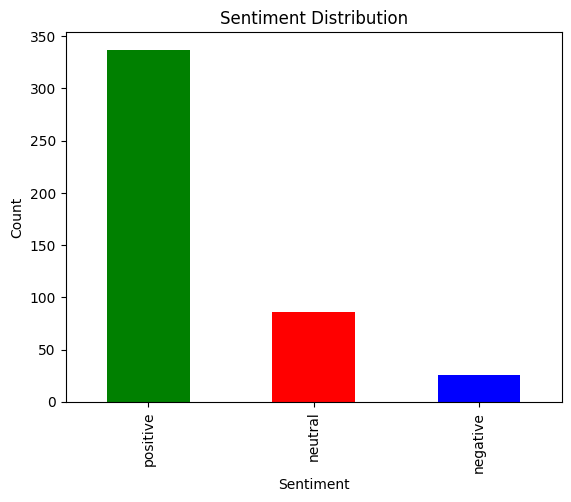

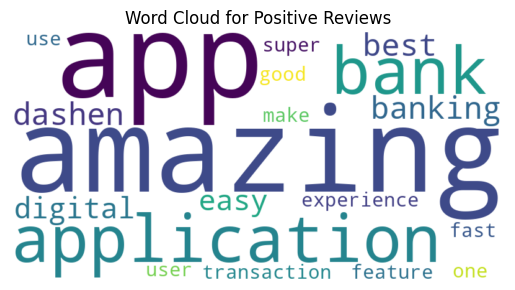

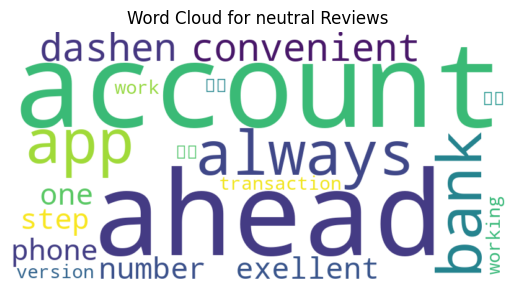

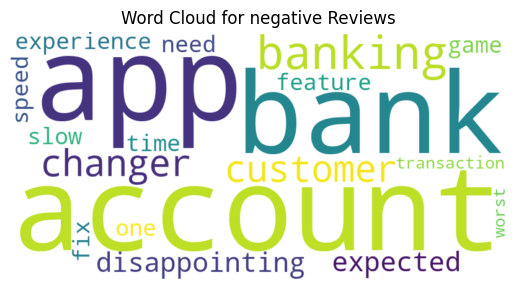

In [ ]:
df['textBlob_result'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

positive_text = ' '.join(positive_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


neutral_text = ' '.join(neutral_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for neutral Reviews')
plt.show()


negative_text = ' '.join(negative_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for negative Reviews')
plt.show()

In [ ]:
df.to_csv('final_data/dashen_analysis.csv')